In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

## Data Preparation

In [4]:
#Import data
cricket = pd.read_csv('Cricket.csv', encoding = 'iso-8859-1')
cricket.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [5]:
cricket_subset = cricket[['Player', 'Ave', 'SR']]
cricket_subset.head()

,Player,Ave,SR
0,SR Tendulkar (INDIA),44.83,86.23
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86
2,RT Ponting (AUS/ICC),42.03,80.39
3,ST Jayasuriya (Asia/SL),32.36,91.20
4,DPMD Jayawardene (Asia/SL),33.37,78.96


In [6]:
subset = cricket_subset[['Ave', 'SR']]
subset.head()

,Ave,SR
0,44.83,86.23
1,41.98,78.86
2,42.03,80.39
3,32.36,91.20
4,33.37,78.96


## Scaling Data

In [7]:
scaler = StandardScaler()
scaled_subset = scaler.fit_transform(subset)
scaled_subset

array([[ 1.07229395,  0.70315153],
       [ 0.58772461, -0.0441395 ],
       [ 0.59622582,  0.1109969 ],
       [-1.04790945,  1.20709133],
       [-0.87618487, -0.03399986],
       [ 0.16946476, -0.51259058],
       [ 0.99238251, -0.64947564],
       [ 0.42450125, -0.56734461],
       [ 0.108256  , -0.8167796 ],
       [ 0.33268811,  0.02176813],
       [ 0.12695867,  0.70315153],
       [ 0.54181804, -0.42538973],
       [-0.44772356,  1.78910632],
       [ 2.17575185,  0.95258652],
       [-0.2725985 , -0.53489778],
       [ 2.5549061 ,  2.1247282 ],
       [-0.61604765,  0.1860302 ],
       [-0.20288853,  0.58958763],
       [ 0.11675721,  0.13938788],
       [ 0.52311536, -0.86747777],
       [-0.3355075 ,  0.84916225],
       [ 0.48400977, -1.64315977],
       [-0.16208269, -1.17369472],
       [ 0.14056062, -0.24287632],
       [-0.590544  ,  2.53842527],
       [ 2.62121559,  1.1857981 ],
       [-0.40691772,  0.4020044 ],
       [-2.5424233 ,  3.82311689],
       [-1.04110847,

In [8]:
scaled_subset = pd.DataFrame(scaled_subset)
scaled_subset.columns = ['Ave', 'SR']
scaled_subset.head()

,Ave,SR
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000


## Clustering

In [9]:
from sklearn.cluster import KMeans

In [10]:
kmean = KMeans(n_clusters= 4, max_iter = 100)
kmean.fit(scaled_subset)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Analysing

In [11]:
cricket_subset['Cluster'] = kmean.labels_
cricket_subset.head(50)

,Player,Ave,SR,Cluster
0,SR Tendulkar (INDIA),44.83,86.23,2
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86,1
2,RT Ponting (AUS/ICC),42.03,80.39,1
3,ST Jayasuriya (Asia/SL),32.36,91.20,0
4,DPMD Jayawardene (Asia/SL),33.37,78.96,3
5,Inzamam-ul-Haq (Asia/PAK),39.52,74.24,1
6,JH Kallis (Afr/ICC/SA),44.36,72.89,1
7,SC Ganguly (Asia/INDIA),41.02,73.70,1
8,R Dravid (Asia/ICC/INDIA),39.16,71.24,1
9,BC Lara (ICC/WI),40.48,79.51,1


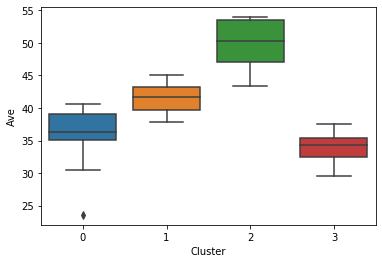

In [12]:
sns.boxplot(x= 'Cluster', y='Ave', data=cricket_subset)

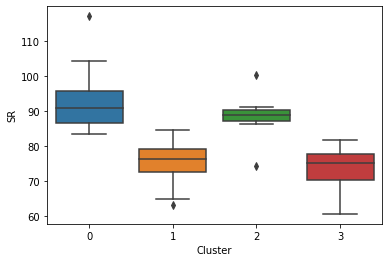

In [13]:
sns.boxplot(x= 'Cluster', y='SR', data=cricket_subset)

## Hierarichial Clustering

In [14]:
from scipy.cluster.hierarchy import dendrogram, cut_tree, linkage

<function matplotlib.pyplot.show(*args, **kw)>

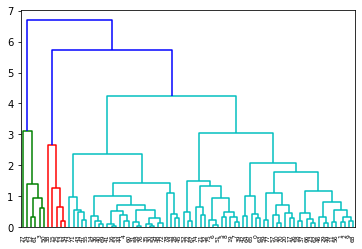

In [15]:
merging = linkage(scaled_subset, method='complete')
dendrogram(merging)
plt.show

In [16]:
cluster_label = cut_tree(merging, n_clusters=4).reshape(-1,)
cluster_label

array([0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 3, 2, 3, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 3, 0, 1, 2, 0, 2, 2, 0, 2, 3, 2, 2, 0, 3, 0, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2])

In [19]:
cricket_subset['Cluster_label'] = cluster_label
cricket_subset.head()

,Player,Ave,SR,Cluster,Cluster_label
0,SR Tendulkar (INDIA),44.83,86.23,2,0
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86,1,0
2,RT Ponting (AUS/ICC),42.03,80.39,1,0
3,ST Jayasuriya (Asia/SL),32.36,91.20,0,1
4,DPMD Jayawardene (Asia/SL),33.37,78.96,3,2


In [20]:
cricket_subset.head(80)

,Player,Ave,SR,Cluster,Cluster_label
0,SR Tendulkar (INDIA),44.83,86.23,2,0
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86,1,0
2,RT Ponting (AUS/ICC),42.03,80.39,1,0
3,ST Jayasuriya (Asia/SL),32.36,91.20,0,1
4,DPMD Jayawardene (Asia/SL),33.37,78.96,3,2
...,...,...,...,...,...
74,CG Greenidge (WI),45.03,64.92,1,0
75,Misbah-ul-Haq (PAK),43.40,73.75,1,0
76,PD Collingwood (ENG),35.36,76.98,3,2
77,A Symonds (AUS),39.75,92.44,0,0


In [21]:
cricket_subset.head(50)

,Player,Ave,SR,Cluster,Cluster_label
0,SR Tendulkar (INDIA),44.83,86.23,2,0
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86,1,0
2,RT Ponting (AUS/ICC),42.03,80.39,1,0
3,ST Jayasuriya (Asia/SL),32.36,91.20,0,1
4,DPMD Jayawardene (Asia/SL),33.37,78.96,3,2
5,Inzamam-ul-Haq (Asia/PAK),39.52,74.24,1,0
6,JH Kallis (Afr/ICC/SA),44.36,72.89,1,0
7,SC Ganguly (Asia/INDIA),41.02,73.70,1,0
8,R Dravid (Asia/ICC/INDIA),39.16,71.24,1,0
9,BC Lara (ICC/WI),40.48,79.51,1,0
